In [ ]:
pip install opencv-python streamlit numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 847.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
streamlit run car_damage_preprocessing.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: car_damage_preprocessing.py


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

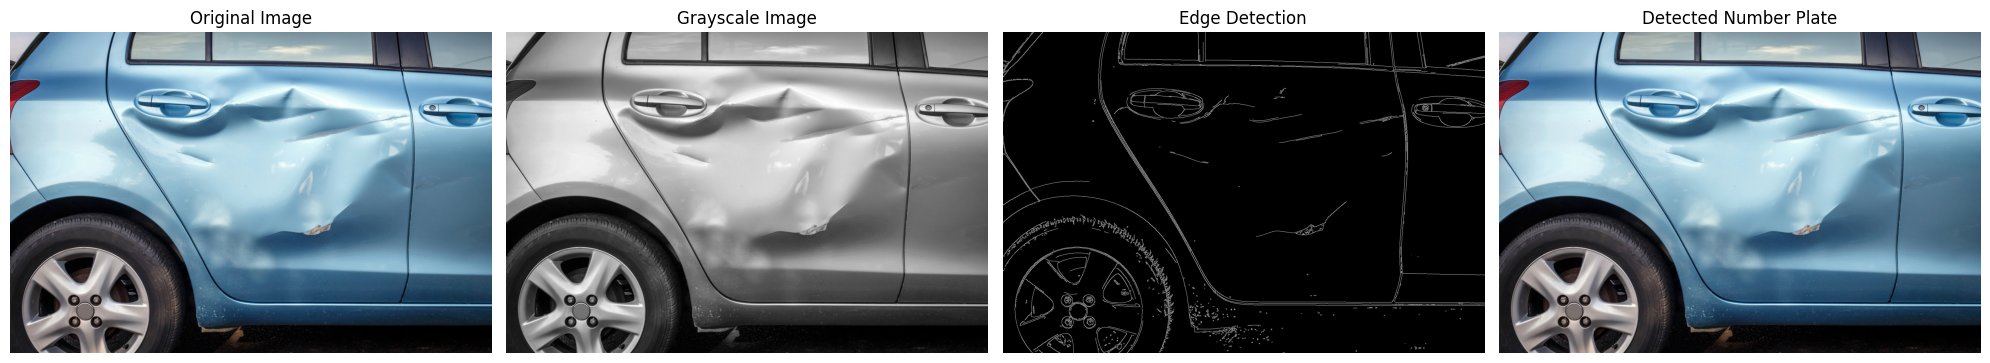

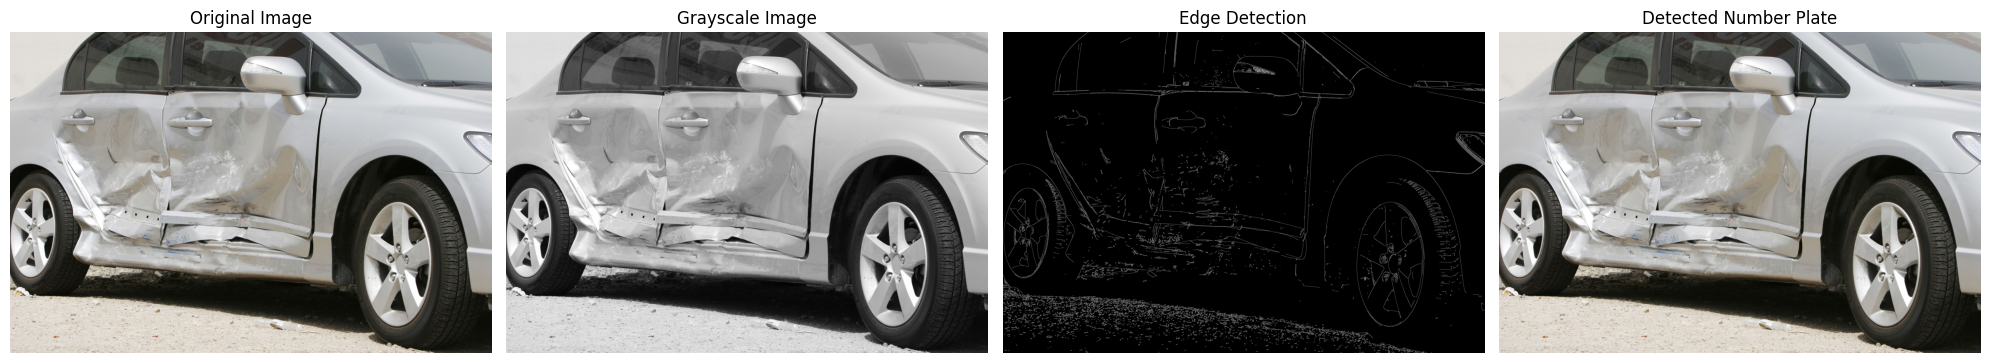

In [ ]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt

# Path to the input images
IMAGE_PATHS = ['/content/how_to_tell_real_damage_from_superficial_damage-pic-7884470299278142671-1600x1200.jpeg',
              '/content/iStock_3324011_LARGE.jpg']

# Process each image individually
for image_path in IMAGE_PATHS:
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert BGR to RGB for visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # Initialize EasyOCR Reader
    reader = easyocr.Reader(['en'], gpu=False)

    # Perform OCR on the original image (BGR)
    results = reader.readtext(image)

    # Draw results on a copy of the image
    image_with_boxes = image.copy()

    for (bbox, text, prob) in results:
        if prob > 0.5:
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))

            cv2.rectangle(image_with_boxes, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(image_with_boxes, text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Convert the final image with boxes to RGB for display
    image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    # Display all steps for the current image
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))

    axs[0].imshow(image_rgb)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(gray_image, cmap='gray')
    axs[1].set_title("Grayscale Image")
    axs[1].axis('off')

    axs[2].imshow(edges, cmap='gray')
    axs[2].set_title("Edge Detection")
    axs[2].axis('off')

    axs[3].imshow(image_with_boxes_rgb)
    axs[3].set_title("Detected Number Plate")
    axs[3].axis('off')

    plt.tight_layout()
    plt.show()